<a href="https://colab.research.google.com/github/msarkar92/pandas-basics/blob/main/Day_7_Copy_of_pandas_%2B_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [ ]:
pd.Series([23,34,np.nan,56,4,3])

,0
0,23.0
1,34.0
2,NaN
3,56.0
4,4.0
5,3.0


In [ ]:
pd.Series([23,34,None,56,4,3])

,0
0,23.0
1,34.0
2,NaN
3,56.0
4,4.0
5,3.0


In [ ]:
pd.Series([23,34,None,56,4,3]).isnull()

,0
0,False
1,False
2,True
3,False
4,False
5,False


In [ ]:
s1 = pd.Series(["asd23",34,None,56,4,3])
s1

,0
0,asd23
1,34
2,None
3,56
4,4
5,3


In [ ]:
s1.isnull()

,0
0,False
1,False
2,True
3,False
4,False
5,False


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dummy Industry Data: Retail Sales
data = {
    'Region': ['North', 'South', 'East'] * 3,
    'Month': ['Jan',"Jan",np.nan]  + ['Feb'] * 3 + ['Mar'] * 3,
    'Electronics_Sales': [20000, 15000, np.nan, 22000, 17000, 20000, 25000, np.nan, 23000],
    'Clothing_Sales': [10000, 8000, 9500, 12000, np.nan, 11000, 13000, 10000, 12000]
}

df = pd.DataFrame(data)
df

,Region,Month,Electronics_Sales,Clothing_Sales
0,North,Jan,20000.0,10000.0
1,South,Jan,15000.0,8000.0
2,East,NaN,NaN,9500.0
3,North,Feb,22000.0,12000.0
4,South,Feb,17000.0,NaN
5,East,Feb,20000.0,11000.0
6,North,Mar,25000.0,13000.0
7,South,Mar,NaN,10000.0
8,East,Mar,23000.0,12000.0


In [ ]:
df.dropna()

,Region,Month,Electronics_Sales,Clothing_Sales
0,North,Jan,20000.0,10000.0
1,South,Jan,15000.0,8000.0
3,North,Feb,22000.0,12000.0
5,East,Feb,20000.0,11000.0
6,North,Mar,25000.0,13000.0
8,East,Mar,23000.0,12000.0


In [ ]:
df.isna()

,Region,Month,Electronics_Sales,Clothing_Sales
0,False,False,False,False
1,False,False,False,False
2,False,True,True,False
3,False,False,False,False
4,False,False,False,True
5,False,False,False,False
6,False,False,False,False
7,False,False,True,False
8,False,False,False,False


In [ ]:
True+False+True
#1+0+1

2

In [ ]:
df.isnull().sum(axis=1) # column and it will sum that
#axis 1 - row
#axis 0 - column

,0
0,0
1,0
2,2
3,0
4,1
5,0
6,0
7,1
8,0


In [ ]:
df.isnull().sum(axis=0) # column and it will sum that


,0
Region,0
Month,1
Electronics_Sales,2
Clothing_Sales,1


In [ ]:
df['Month'].mode()

,Month
0,Feb
1,Mar


In [ ]:
mode_value = df['Month'].mode().iloc[1]
mode_value

'Mar'

In [ ]:
df['Month'].fillna(mode_value)

,Month
0,Jan
1,Jan
2,Mar
3,Feb
4,Feb
5,Feb
6,Mar
7,Mar
8,Mar


In [ ]:
df['Month'].fillna("salaj")

,Month
0,Jan
1,Jan
2,salaj
3,Feb
4,Feb
5,Feb
6,Mar
7,Mar
8,Mar


In [ ]:
df['Month'] = df['Month'].fillna(df['Month'].mode().iloc[1])

In [ ]:
df['Electronics_Sales'].mean()

np.float64(20285.714285714286)

In [ ]:
df['Electronics_Sales'] = df['Electronics_Sales'].fillna(df['Electronics_Sales'].mean())
df['Clothing_Sales'] = df['Clothing_Sales'].fillna(df['Clothing_Sales'].median())

In [ ]:
df

,Region,Month,Electronics_Sales,Clothing_Sales
0,North,Jan,20000.000000,10000.0
1,South,Jan,15000.000000,8000.0
2,East,Mar,20285.714286,9500.0
3,North,Feb,22000.000000,12000.0
4,South,Feb,17000.000000,10500.0
5,East,Feb,20000.000000,11000.0
6,North,Mar,25000.000000,13000.0
7,South,Mar,20285.714286,10000.0
8,East,Mar,23000.000000,12000.0


In [ ]:
df.isnull().sum()

,0
Region,0
Month,0
Electronics_Sales,0
Clothing_Sales,0


# Melt

In [ ]:
# Dummy Industry Data: Retail Sales
data = {
    'Region': ['North', 'South', 'East'] * 3,
    'Month': ['Jan'] * 3 + ['Feb'] * 3 + ['Mar'] * 3,
    'Electronics_Sales': [20000, 15000, 18000, 22000, 17000, 20000, 25000, 18000, 23000],
    'Clothing_Sales': [10000, 8000, 9500, 12000, 9000, 11000, 13000, 10000, 12000]
}

df = pd.DataFrame(data)
df

,Region,Month,Electronics_Sales,Clothing_Sales
0,North,Jan,20000,10000
1,South,Jan,15000,8000
2,East,Jan,18000,9500
3,North,Feb,22000,12000
4,South,Feb,17000,9000
5,East,Feb,20000,11000
6,North,Mar,25000,13000
7,South,Mar,18000,10000
8,East,Mar,23000,12000


In [ ]:
melted = pd.melt(df, id_vars=['Region', 'Month'],
                 value_vars=['Electronics_Sales', 'Clothing_Sales'],
                 var_name='Category', value_name='Sales')
melted


,Region,Month,Category,Sales
0,North,Jan,Electronics_Sales,20000
1,South,Jan,Electronics_Sales,15000
2,East,Jan,Electronics_Sales,18000
3,North,Feb,Electronics_Sales,22000
4,South,Feb,Electronics_Sales,17000
5,East,Feb,Electronics_Sales,20000
6,North,Mar,Electronics_Sales,25000
7,South,Mar,Electronics_Sales,18000
8,East,Mar,Electronics_Sales,23000
9,North,Jan,Clothing_Sales,10000


In [ ]:
!gdown 173A59xh2mnpmljCCB9bhC4C5eP2IS6qZ


Downloading...
From: https://drive.google.com/uc?id=173A59xh2mnpmljCCB9bhC4C5eP2IS6qZ
To: /content/Pfizer_1.csv
100% 1.51k/1.51k [00:00<00:00, 6.60MB/s]


In [ ]:
data = pd.read_csv('Pfizer_1.csv')
data

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20
5,15-10-2020,ketamine hydrochloride,Pressure,8.0,NaN,NaN,7.0,NaN,9,10.0,11.0,10.0,9,9.0,11
6,16-10-2020,diltiazem hydrochloride,Temperature,34.0,35.0,36.0,36.0,37.0,38,37.0,38.0,39.0,40,NaN,42
7,16-10-2020,diltiazem hydrochloride,Pressure,18.0,19.0,20.0,21.0,22.0,23,24.0,25.0,25.0,24,NaN,27
8,16-10-2020,docetaxel injection,Temperature,46.0,47.0,NaN,48.0,48.0,49,50.0,52.0,55.0,56,57.0,58
9,16-10-2020,docetaxel injection,Pressure,23.0,24.0,NaN,25.0,26.0,27,28.0,29.0,28.0,28,29.0,30


In [ ]:
d = pd.melt(data,id_vars = ["Date","Drug_Name" ,"Parameter"])
d


,Date,Drug_Name,Parameter,variable,value
0,15-10-2020,diltiazem hydrochloride,Temperature,1:30:00,23.0
1,15-10-2020,diltiazem hydrochloride,Pressure,1:30:00,12.0
2,15-10-2020,docetaxel injection,Temperature,1:30:00,NaN
3,15-10-2020,docetaxel injection,Pressure,1:30:00,NaN
4,15-10-2020,ketamine hydrochloride,Temperature,1:30:00,24.0
...,...,...,...,...,...
211,17-10-2020,diltiazem hydrochloride,Pressure,12:30:00,14.0
212,17-10-2020,docetaxel injection,Temperature,12:30:00,23.0
213,17-10-2020,docetaxel injection,Pressure,12:30:00,28.0
214,17-10-2020,ketamine hydrochloride,Temperature,12:30:00,24.0


# pivot_table

In [ ]:
melted

,Region,Month,Category,Sales
0,North,Jan,Electronics_Sales,20000
1,South,Jan,Electronics_Sales,15000
2,East,Jan,Electronics_Sales,18000
3,North,Feb,Electronics_Sales,22000
4,South,Feb,Electronics_Sales,17000
5,East,Feb,Electronics_Sales,20000
6,North,Mar,Electronics_Sales,25000
7,South,Mar,Electronics_Sales,18000
8,East,Mar,Electronics_Sales,23000
9,North,Jan,Clothing_Sales,10000


In [ ]:
melted.columns

Index(['Region', 'Month', 'Category', 'Sales'], dtype='object')

In [ ]:
pivot = pd.pivot_table(melted, values='Sales', index='Region',
                       columns='Category', aggfunc='min')
pivot

Category,Clothing_Sales,Electronics_Sales
Region,,
East,9500,18000
North,10000,20000
South,8000,15000


In [ ]:
d

,Date,Drug_Name,Parameter,variable,value
0,15-10-2020,diltiazem hydrochloride,Temperature,1:30:00,23.0
1,15-10-2020,diltiazem hydrochloride,Pressure,1:30:00,12.0
2,15-10-2020,docetaxel injection,Temperature,1:30:00,NaN
3,15-10-2020,docetaxel injection,Pressure,1:30:00,NaN
4,15-10-2020,ketamine hydrochloride,Temperature,1:30:00,24.0
...,...,...,...,...,...
211,17-10-2020,diltiazem hydrochloride,Pressure,12:30:00,14.0
212,17-10-2020,docetaxel injection,Temperature,12:30:00,23.0
213,17-10-2020,docetaxel injection,Pressure,12:30:00,28.0
214,17-10-2020,ketamine hydrochloride,Temperature,12:30:00,24.0


In [ ]:
pivot = pd.pivot_table(d, values='value', index='Drug_Name',
                       columns='Parameter', aggfunc='max')
pivot

Parameter,Pressure,Temperature
Drug_Name,,
diltiazem hydrochloride,27.0,42.0
docetaxel injection,30.0,58.0
ketamine hydrochloride,18.0,27.0


In [ ]:
pivot = pd.pivot_table(d, values='value', index='Drug_Name',
                       columns='Parameter',  aggfunc=['min', 'max'])
pivot

min                  max            
Parameter               Pressure Temperature Pressure Temperature
Drug_Name                                                        
diltiazem hydrochloride      3.0        10.0     27.0        42.0
docetaxel injection         20.0        12.0     30.0        58.0
ketamine hydrochloride       7.0         8.0     18.0        27.0

In [ ]:
pivot = pd.pivot_table(d, values='value', index='Drug_Name',
                       columns='variable', aggfunc='max')
pivot

variable,10:30:00,11:30:00,12:30:00,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00
Drug_Name,,,,,,,,,,,,
diltiazem hydrochloride,40.0,20.0,42.0,34.0,35.0,36.0,36.0,37.0,38.0,37.0,38.0,39.0
docetaxel injection,56.0,57.0,58.0,46.0,47.0,22.0,48.0,48.0,49.0,50.0,52.0,55.0
ketamine hydrochloride,22.0,23.0,24.0,24.0,14.0,15.0,27.0,17.0,26.0,25.0,24.0,23.0


# Visualization

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/101/215/original/clean_amazon_data.csv

--2025-11-05 17:05:58--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/101/215/original/clean_amazon_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.210.103, 99.84.210.230, 99.84.210.99, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.210.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6052052 (5.8M) [text/plain]
Saving to: ‘clean_amazon_data.csv’

clean_amazon_data.c 100%[===================>]   5.77M  3.52MB/s    in 1.6s    

2025-11-05 17:06:01 (3.52 MB/s) - ‘clean_amazon_data.csv’ saved [6052052/6052052]



In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('clean_amazon_data.csv')
df.head()

,product_id,user_id,user_name,review_id,review_title,review_content,order_timestamp,product_name,category,discounted_price,...,rating_filled,category_filled,calculated_discount_filled,contains_durable,product_qid,week_number,day_name,year,month,month_year
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,2023-01-01 00:00:00.000000000,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,...,4.2,Computers&Accessories,63.694268,True,1672909124,52,Sunday,2023,1,January 2023
1,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,2023-01-01 00:00:00.000000000,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,...,4.2,Computers&Accessories,63.694268,True,1672895755,52,Sunday,2023,1,January 2023
2,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,2023-01-01 00:00:00.000000000,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,...,4.2,Computers&Accessories,63.694268,True,1672902996,52,Sunday,2023,1,January 2023
3,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,2023-01-01 05:58:01.967213114,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,...,4.0,Computers&Accessories,42.979943,True,1672909124,52,Sunday,2023,1,January 2023
4,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,2023-01-01 05:58:01.967213114,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,...,4.0,Computers&Accessories,42.979943,True,1672895755,52,Sunday,2023,1,January 2023


In [ ]:
df.columns

Index(['product_id', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'order_timestamp', 'product_name', 'category',
       'discounted_price', 'actual_price', 'rating', 'rating_count',
       'about_product', 'img_link', 'product_link', 'review_title_uppercase',
       'calculated_discount', 'price_range', 'rating_category',
       'rating_filled', 'category_filled', 'calculated_discount_filled',
       'contains_durable', 'product_qid', 'week_number', 'day_name', 'year',
       'month', 'month_year'],
      dtype='object')

In [ ]:
df.groupby('category')['calculated_discount'].mean()

,calculated_discount
category,
Car&Motorbike,41.525000
Computers&Accessories,55.374270
Electronics,52.152439
Health&PersonalCare,52.684211
Home&Kitchen,40.241448
HomeImprovement,57.944088
MusicalInstruments,45.808298
OfficeProducts,12.771811
Toys&Games,0.000000


<Axes: xlabel='category'>

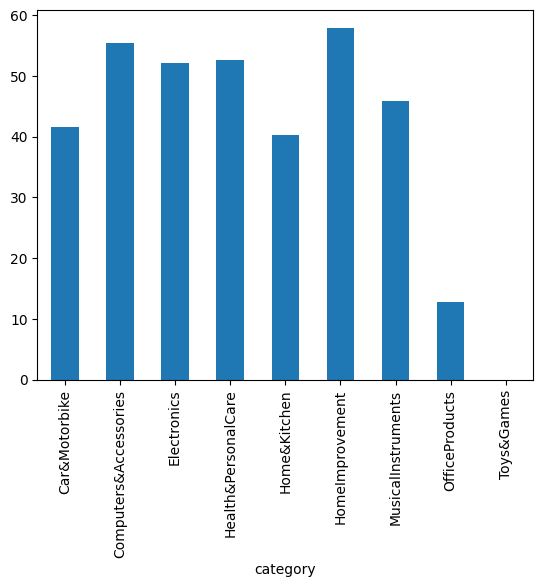

In [ ]:
df.groupby('category')['calculated_discount'].mean().plot(kind="bar")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro

In [ ]:
x= [1,2,3,4,5,6]
y = [100,120,89,230,45,100]

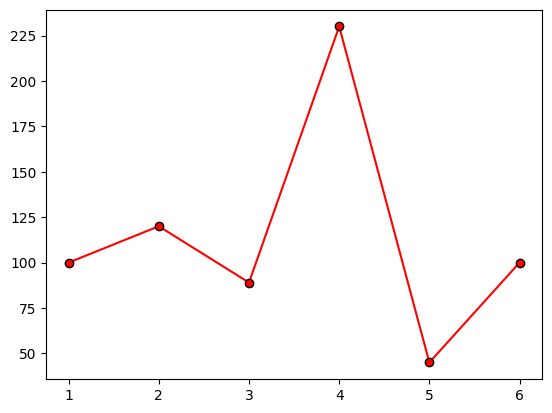

In [ ]:
plt.plot(x,y,marker="o",color="red",markeredgecolor="black")

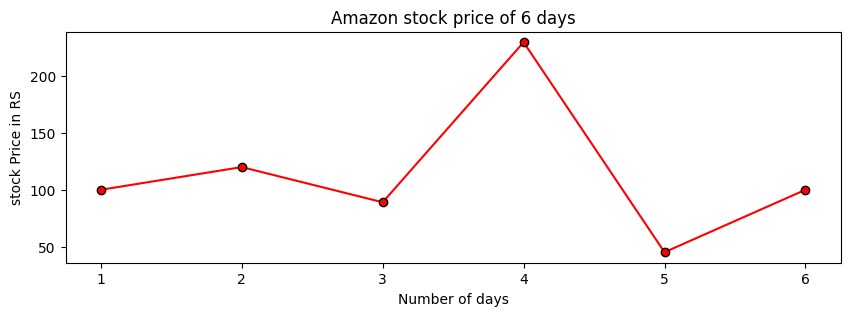

In [ ]:
plt.figure(figsize=(10,3))# budefault it is 6,4
plt.plot(x,y,marker="o",color="red",markeredgecolor="black")
plt.title("Amazon stock price of 6 days")
plt.xlabel("Number of days")
plt.ylabel("stock Price in RS")

plt.show() #do not show any extra inf just show the plot

In [ ]:
df['rating']

,rating
0,4.2
1,4.2
2,4.2
3,4.0
4,4.0
...,...
1732,4.0
1733,4.1
1734,3.6
1735,4.0


In [ ]:
import seaborn as sns

<Axes: xlabel='rating', ylabel='Count'>

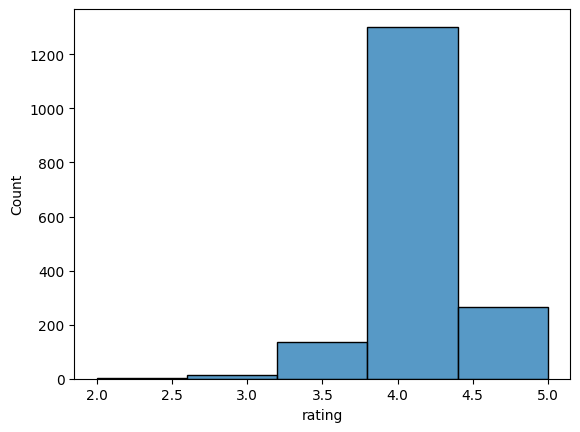

In [ ]:
sns.histplot(df['rating'],bins=5)

<Axes: xlabel='discounted_price', ylabel='Count'>

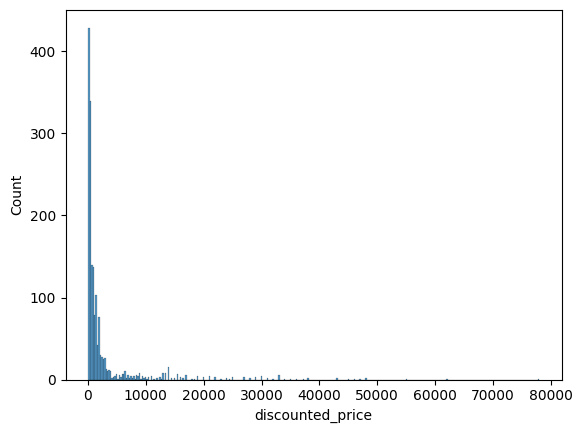

In [ ]:

sns.histplot(df['discounted_price'])

(array([ 1., 10.,  3.,  3.,  1.]),
 array([12. , 18.6, 25.2, 31.8, 38.4, 45. ]),
 <BarContainer object of 5 artists>)

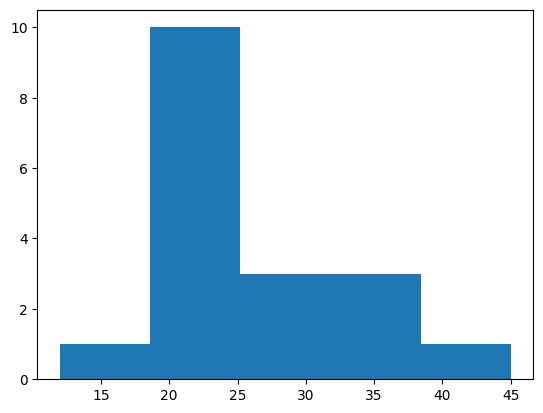

In [ ]:
plt.hist([23,32,23,12,23,21,22,24,25,27,28,31,32,34,45,23,23,25],bins=5)

<Axes: ylabel='Count'>

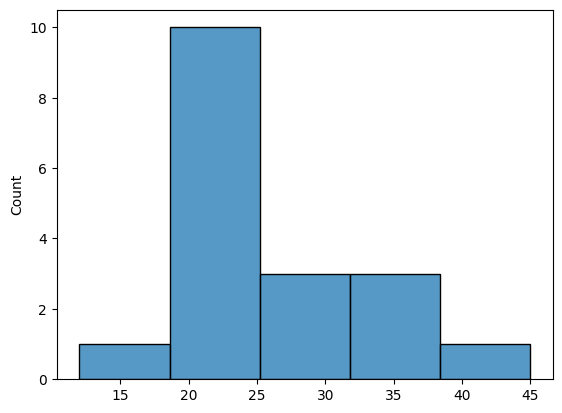

In [ ]:
sns.histplot([23,32,23,12,23,21,22,24,25,27,28,31,32,34,45,23,23,25],bins=5)

In [ ]:
df['rating'].mean()

np.float64(4.105998835177635)

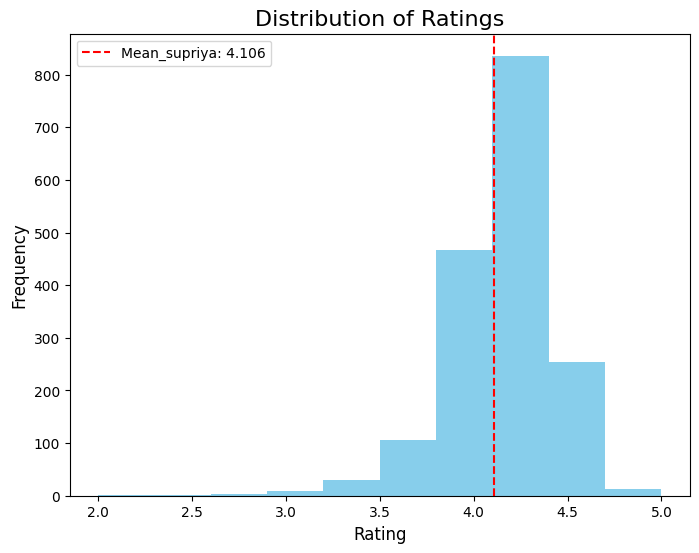

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=10, color='skyblue')
plt.axvline(df['rating'].mean(), color='red', linestyle='--', label=f"Mean_supriya: {df['rating'].mean():.3f}")

plt.title("Distribution of Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()


In [ ]:
#df.groupby('category')['calculated_discount'].mean()
df["category"].value_counts()

,count
category,
Computers&Accessories,647
Electronics,595
Home&Kitchen,444
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


In [ ]:
x = df["category"].value_counts().index
x

Index(['Computers&Accessories', 'Electronics', 'Home&Kitchen',
       'OfficeProducts', 'MusicalInstruments', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'],
      dtype='object', name='category')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Computers&Accessories'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Home&Kitchen'),
  Text(3, 0, 'OfficeProducts'),
  Text(4, 0, 'MusicalInstruments'),
  Text(5, 0, 'HomeImprovement'),
  Text(6, 0, 'Toys&Games'),
  Text(7, 0, 'Car&Motorbike'),
  Text(8, 0, 'Health&PersonalCare')])

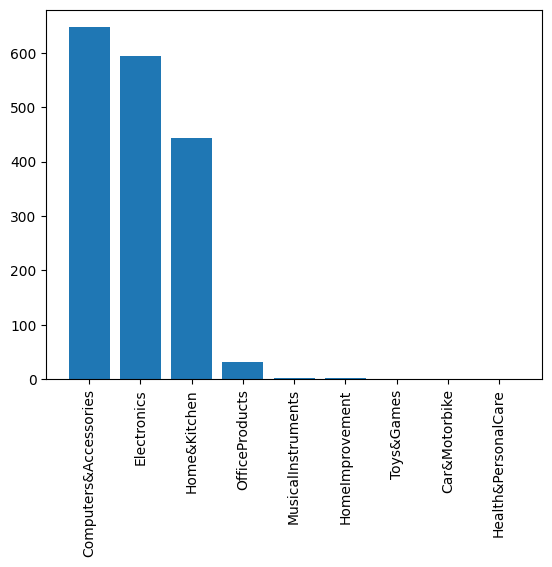

In [ ]:
plt.bar(x,df["category"].value_counts())
plt.xticks(rotation=90)

In [ ]:
df['rating'].mean()


np.float64(4.105998835177635)

In [ ]:
df.groupby('category')['rating'].mean()

,rating
category,
Car&Motorbike,3.800000
Computers&Accessories,4.158934
Electronics,4.090508
Health&PersonalCare,4.000000
Home&Kitchen,4.045890
HomeImprovement,4.250000
MusicalInstruments,3.900000
OfficeProducts,4.309677
Toys&Games,4.300000


In [ ]:
df['mean_rating'] = df.groupby('category')['rating'].transform('mean')


In [ ]:
df[["category",'mean_rating']]

,category,mean_rating
0,Computers&Accessories,4.158934
1,Computers&Accessories,4.158934
2,Computers&Accessories,4.158934
3,Computers&Accessories,4.158934
4,Computers&Accessories,4.158934
...,...,...
1732,Home&Kitchen,4.045890
1733,Home&Kitchen,4.045890
1734,Home&Kitchen,4.045890
1735,Home&Kitchen,4.045890


Day 7 Solutions

Q1

In [3]:
import pandas as pd
import seaborn as sns
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

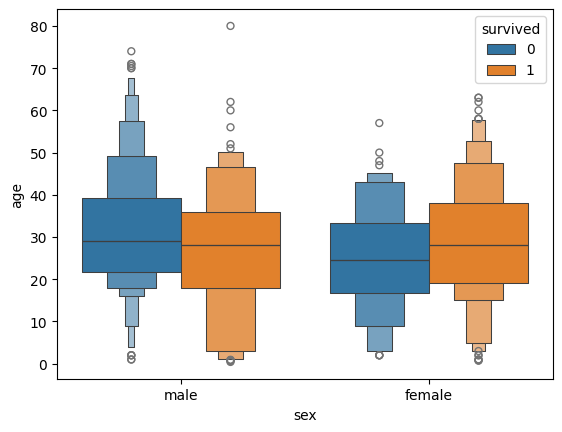

In [10]:
sns.boxenplot(data=titanic, x="sex", y="age", hue="survived")
# Plotting is correct

Q3

In [ ]:
series_of_protien = pd.Series([4, 3, 4, 4, 2, 2, 2, 3, 2, 3, 1, 6, 1, 3, 1, 2, 2, 1, 1, 3, 3, 2, 2, 2, 2, 1, 3, 3, 3, 1,
                               2, 1, 3, 3, 3, 1, 3, 1, 2, 3, 2, 4, 2, 4, 4, 4, 3, 2, 2, 3, 3, 3, 3, 3, 1, 2, 4, 5, 3, 3,
                               2, 1, 2, 2, 3, 3, 2, 6, 2, 2, 3, 3, 2, 1, 3, 3, 2], name='Protien' )

series_of_protien

,Protien
0,4
1,3
2,4
3,4
4,2
...,...
72,2
73,1
74,3
75,3


In [ ]:
x_index = series_of_protien.value_counts().index
x_index

Index([3, 2, 1, 4, 6, 5], dtype='int64', name='Protien')

In [ ]:
values_by_count = series_of_protien.value_counts()
values_by_count

,count
Protien,
3,28
2,25
1,13
4,8
6,2
5,1


In [ ]:
sorted_index = sorted(x_index)
sorted_index

[1, 2, 3, 4, 5, 6]

In [ ]:
# values = series_of_protien.value_counts()
# values.sort_values(ascending=False)

Text(0.5, 1.0, 'Protein comparison')

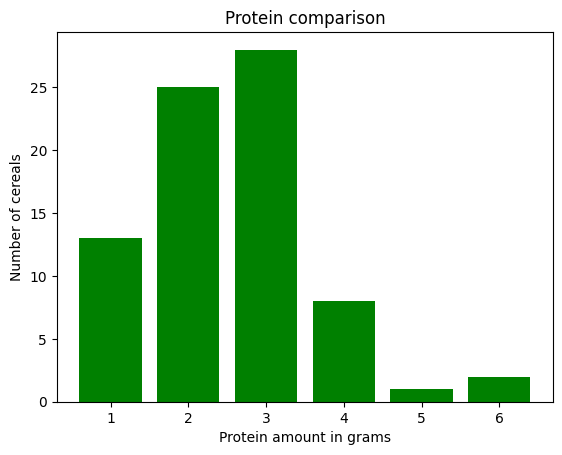

In [ ]:
# df.groupby('category')['calculated_discount'].mean().plot(kind="bar")
# series_of_protien.plot(kind='bar')

bars = plt.bar(x_index,values_by_count,color='g')
plt.xlabel('Protein amount in grams')
plt.ylabel('Number of cereals')
plt.title('Protein comparison')

# heights = [bar.get_height() for bar in bars]
# heights


In [ ]:
print(values_by_count[sorted_index[0]].astype(float), values_by_count[sorted_index[-1]].astype(float))

13.0 2.0


Alternate solution (by scaler TA bot)

[4, 3, 4, 4, 2, 2, 2, 3, 2, 3, 1, 6, 1, 3, 1, 2, 2, 1, 1, 3, 3, 2, 2, 2, 2, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 1, 2, 3, 2, 4, 2, 4, 4, 4, 3, 2, 2, 3, 3, 3, 3, 3, 1, 2, 4, 5, 3, 3, 2, 1, 2, 2, 3, 3, 2, 6, 2, 2, 3, 3, 2, 1, 3, 3, 2] 


(13, 2)

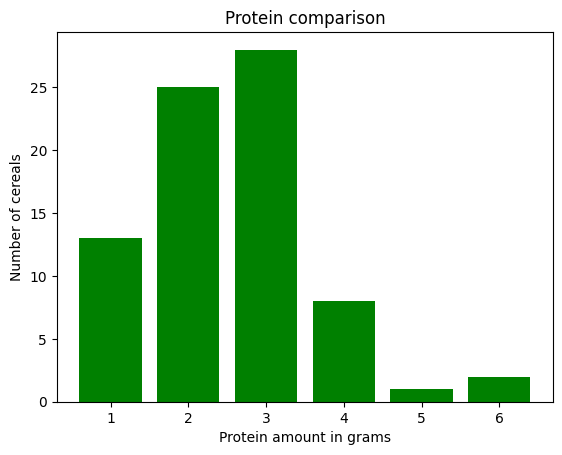

In [ ]:
from collections import Counter

protein = eval(input())  # Keep this if it's working for your input

# Count occurrences of each protein value
protein_counts = Counter(protein)

# Sort the counts
sorted_counts = sorted(protein_counts.items())

# Separate x and y values for plotting
x_values = [item[0] for item in sorted_counts]
y_values = [item[1] for item in sorted_counts]

# Create the bar plot
plt.figure()
bars = plt.bar(x_values, y_values, color='g')

# Add labels and title
plt.xlabel('Protein amount in grams')
plt.ylabel('Number of cereals')
plt.title('Protein comparison')

# Print the heights of the first and last bars
y_values[0], y_values[-1]

In [ ]:
sorted_counts

[(1, 13), (2, 25), (3, 28), (4, 8), (5, 1), (6, 2)]

In [ ]:
help(Counter())

Help on Counter in module collections object:

class Counter(builtins.dict)
 |  Counter(iterable=None, /, **kwds)
 |
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                       

Q5

Note:

While you can create plots using Seaborn functions, and in some interactive environments like Jupyter notebooks the plot might display automatically, Seaborn itself is built on top of Matplotlib. This means that at its core, every **Seaborn plot is fundamentally a Matplotlib plot.**

Therefore, for full control over displaying and customizing your plots, especially in non-interactive environments or when you need to explicitly manage figures and axes,**you will still typically need to import matplotlib.pyplot and use functions like plt.show().**





In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
b = [479.99, 1249.99, 649.99, 399.99, 699.99, 1249.99, 1349.99, 999.99, 649.99, 479.99, 1349.99, 1249.99, 649.99, 649.99, 999.99, 399.99, 699.99, 999.99, 399.99, 649.99]
c = [143.39, 230.89, 118.64, 72.09, 98.09, 230.89, 180.34, 146.69, 122.34, 143.39, 180.34, 230.89, 122.34, 118.64, 146.69, 72.09, 98.09, 146.69, 72.09, 122.34]

In [ ]:
df = pd.DataFrame({'Sale ID': a, 'Selling Price': b, 'Profit': c})

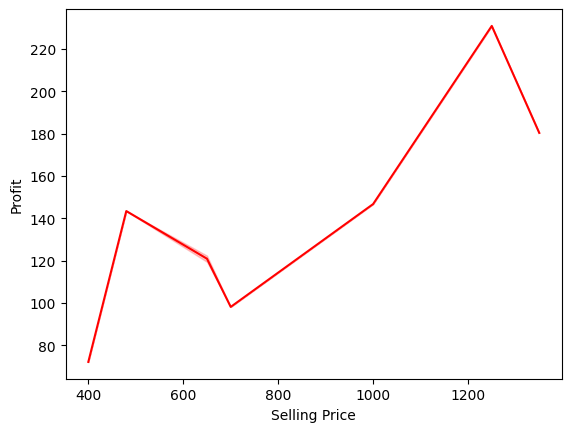

In [ ]:
plot = sns.lineplot(x=b, y=c, data=df, color='r')

# Add labels and title
plt.xlabel('Selling Price')
plt.ylabel('Profit')
# plt.title('Protein comparison')

plt.show()

Q7

In [ ]:
source = ['Website','Poster 4', 'Website','Website','Poster 4', 'Poster 2'
                    ,'Email','Website','Email','Poster 2']
profit = [143.39,230.89,118.64,72.09,98.09,230.89,
                              180.34,146.69,122.34,143.39]

print(source,"\n", profit)

['Website', 'Poster 4', 'Website', 'Website', 'Poster 4', 'Poster 2', 'Email', 'Website', 'Email', 'Poster 2'] 
 [143.39, 230.89, 118.64, 72.09, 98.09, 230.89, 180.34, 146.69, 122.34, 143.39]


In [ ]:
df = pd.DataFrame({'Sale ID':[1,2,3,4,5,6,7,8,9,10],
                    'Source':source,
                    'Profit':profit})
df.sort_values(by='Source', inplace=True)
df

,Sale ID,Source,Profit
6,7,Email,180.34
8,9,Email,122.34
5,6,Poster 2,230.89
9,10,Poster 2,143.39
1,2,Poster 4,230.89
4,5,Poster 4,98.09
0,1,Website,143.39
2,3,Website,118.64
3,4,Website,72.09
7,8,Website,146.69


In [ ]:
df['Source'].value_counts()

,count
Source,
Website,4
Email,2
Poster 2,2
Poster 4,2


In [ ]:
df.groupby(by='Source')['Profit'].sum().sort_values(ascending=False)

,Profit
Source,
Website,480.81
Poster 2,374.28
Poster 4,328.98
Email,302.68


/tmp/ipython-input-1204659408.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source, y=profit,


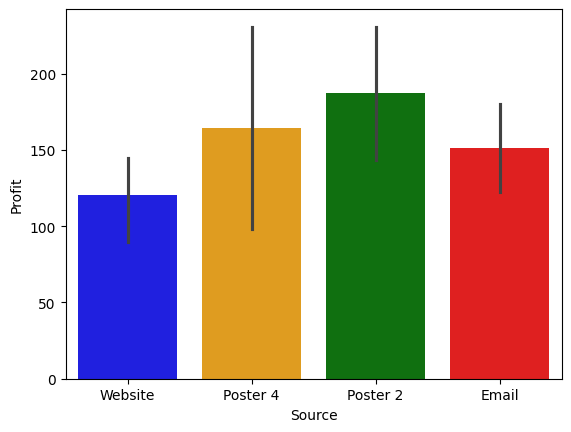

In [ ]:
sns.barplot(x=source, y=profit,
            order=['Website', 'Poster 4', 'Poster 2', 'Email'],
            palette=['blue', 'orange', 'green', 'red'])
plt.xlabel('Source')
plt.ylabel('Profit')
plt.show()

Additional Problems

Add Q1 | Solo trip survival

In [11]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [12]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='alone', ylabel='age'>

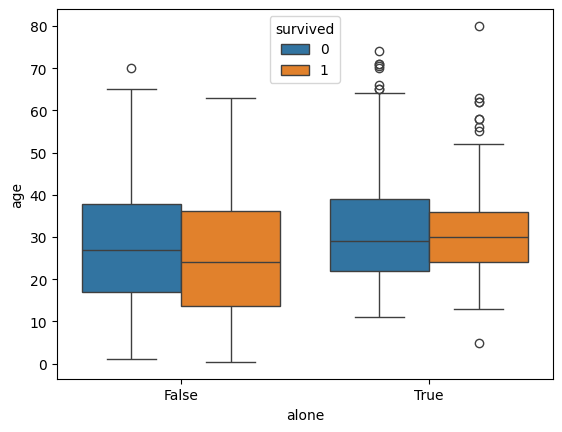

In [13]:
sns.boxplot(data=titanic, x="alone", y="age", hue="survived")

Q5 Countplot

In [24]:
categories = ['Electronics', 'Clothing', 'Electronics', 'Electronics', 'Clothing', 'Clothing', 'Electronics', 'Electronics', 'Clothing', 'Electronics', 'Clothing', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Electronics', 'Clothing', 'Clothing', 'Electronics', 'Electronics']
sources = ['Social Media', 'Email', 'TV Advertisement', 'Social Media', 'Email', 'TV Advertisement', 'Social Media', 'Email', 'TV Advertisement', 'Social Media', 'Email', 'TV Advertisement', 'Social Media', 'Email', 'TV Advertisement', 'Social Media', 'Email', 'TV Advertisement', 'Social Media', 'Email']
df = pd.DataFrame({'Category': categories, 'Marketing Source': sources})
df.head()

,Category,Marketing Source
0,Electronics,Social Media
1,Clothing,Email
2,Electronics,TV Advertisement
3,Electronics,Social Media
4,Clothing,Email


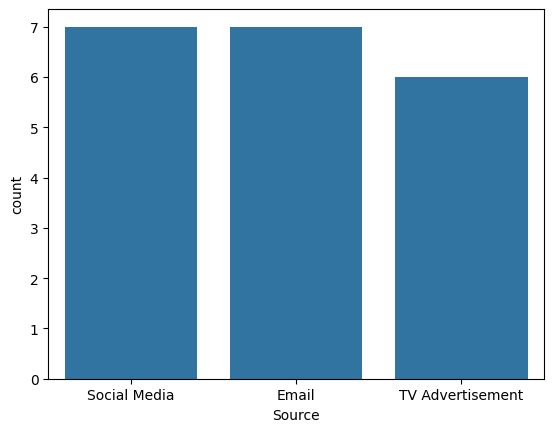

In [28]:
sns.countplot(data=df, x=sources)
plt.xlabel("Source")
plt.ylabel("count")
plt.show()

Q6

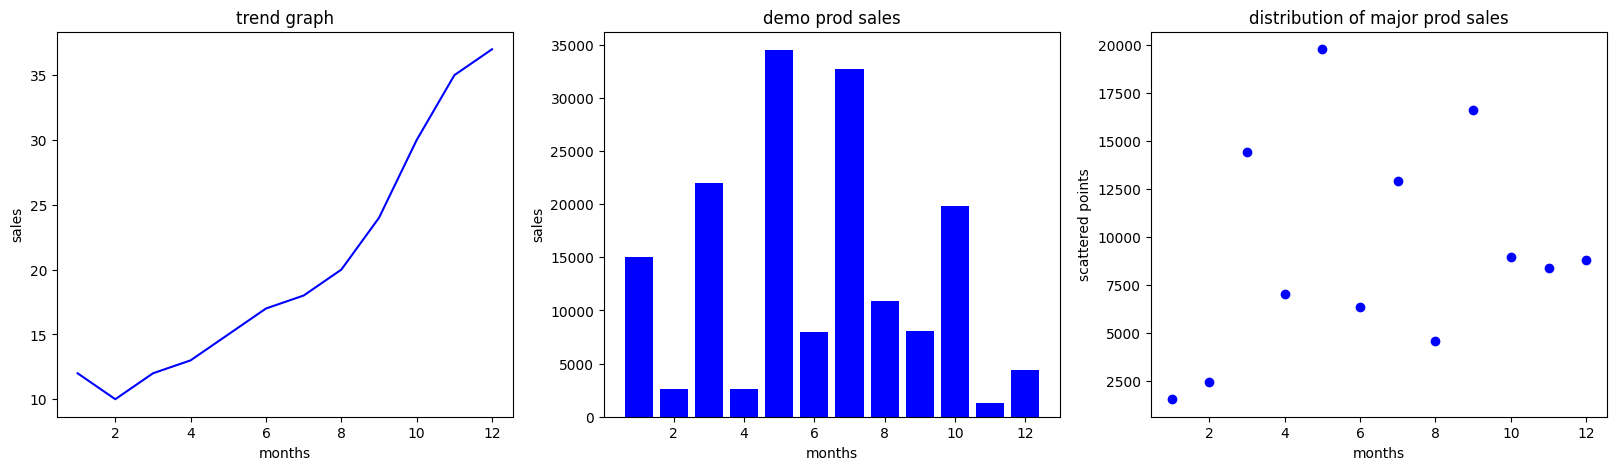

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = [12, 10, 12, 13, 15, 17, 18, 20, 24, 30, 35, 37]
y1 = [14992, 2590, 22010, 2591, 34517, 8019, 32750, 10893, 8039, 19868, 1247, 4404]
y2 = [1545, 2445, 14414, 7013, 19784, 6325, 12936, 4601, 16627, 8939, 8388, 8775]

df = pd.DataFrame({'month_number': x, 'mean_sales': y, 'demo_prod': y1, 'major_prod':y2})

# Set the fig size and fig value
fig = plt.figure(figsize=(20,5))

# Plot first subplot
plt.subplot(1,3,1)
plt.plot(x,y, color='blue')
plt.xlabel('months')
plt.ylabel('sales')
plt.title('trend graph')


# Plot second subplot
plt.subplot(1,3,2)
plt.bar(x,y1, color='blue')
plt.xlabel('months')
plt.ylabel('sales')
plt.title('demo prod sales')


# Plot third subplot
plt.subplot(1,3,3)
plt.scatter(x,y2, color='blue')
plt.xlabel('months')
plt.ylabel('scattered points')
plt.title('distribution of major prod sales')

plt.show()